In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras import optimizers

In [3]:
# Load the dataset
data = pd.read_csv('ratings_small.csv')

In [4]:
# Encode user and movie IDs to start from 0
user_encoder = LabelEncoder()
data['userId'] = user_encoder.fit_transform(data['userId'])
movie_encoder = LabelEncoder()
data['movieId'] = movie_encoder.fit_transform(data['movieId'])

In [5]:
# Split the data into train and test sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

In [6]:
# Get the number of unique users and movies
n_users = data['userId'].nunique()
n_movies = data['movieId'].nunique()

In [7]:
# Define the neural network model
model = Sequential()
model.add(Embedding(n_users, 10, input_length=1))
model.add(Flatten())
model.add(Dense(1, activation='linear'))

In [8]:
# Compile the model
model.compile(optimizer=optimizers.Adam(), loss='mse')

In [9]:
# Train the model
history = model.fit(train_data['userId'], train_data['rating'], epochs=10, verbose=1)

Epoch 1/10
2501/2501 [==============================] - 3s 918us/step - loss: 3.0101
Epoch 2/10
2501/2501 [==============================] - 2s 906us/step - loss: 0.9472
Epoch 3/10
2501/2501 [==============================] - 2s 904us/step - loss: 0.9419
Epoch 4/10
2501/2501 [==============================] - 2s 900us/step - loss: 0.9417
Epoch 5/10
2501/2501 [==============================] - 2s 990us/step - loss: 0.9411
Epoch 6/10
2501/2501 [==============================] - 2s 911us/step - loss: 0.9392
Epoch 7/10
2501/2501 [==============================] - 2s 916us/step - loss: 0.9384
Epoch 8/10
2501/2501 [==============================] - 2s 908us/step - loss: 0.9373
Epoch 9/10
2501/2501 [==============================] - 2s 910us/step - loss: 0.9369
Epoch 10/10
2501/2501 [==============================] - 2s 918us/step - loss: 0.9361


In [10]:
# Make predictions on the test set
predictions = model.predict(test_data['userId']).flatten()

In [11]:
# Display the predictions
test_data['predicted_rating'] = predictions
print("Predictions:")
print(test_data[['userId', 'movieId', 'rating', 'predicted_rating']])

Predictions:
       userId  movieId  rating  predicted_rating
19090     127      832     5.0          3.741890
99678     664     3712     1.0          3.389378
18455     119     3205     3.0          3.588324
35755     256     1028     4.0          3.566339
66536     467     4638     4.0          3.013483
...       ...      ...     ...               ...
74070     517       60     2.0          3.622783
56749     407      862     5.0          3.611487
27665     199     8262     3.5          3.212114
23192     164       75     3.0          2.683520
89397     595      427     4.0          3.602985

[20001 rows x 4 columns]


In [12]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data['rating'].values, predictions))
print('RMSE:', rmse)

RMSE: 0.9661995797120155


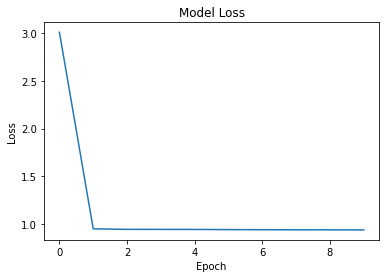

In [13]:
# Plot the loss over epochs
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()